# **Análise do grafo de ingredientes de comidas típicas do Brasil**

In [8]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from nxviz import circos
import matplotlib.patches as mpatches

## **1. Leitura do arquivo CSV**

In [9]:
# Caminho do arquivo CSV
txt_csv_path = 'receitas_brasileiras.csv'

## **2. Função para criação do grafo usando NetworkX**
  ### **2.1. Criação dos nós e atribuição dos tipos como atributos dos nós**
  ### **2.2. Criação das arestas e pesos**

In [10]:
def build_graph(csv_path):
    df = pd.read_csv(csv_path)
    G = nx.Graph()

    # Adicionar nós com atributo 'tipo'
    for _, row in df.iterrows():
        ingredientes = [i.strip() for i in row['ingredientes'].split(',')]
        tipos = [t.strip() for t in row['tipos_ingredientes'].split(',')]
        for ing, tipo in zip(ingredientes, tipos):
            if not G.has_node(ing):
                G.add_node(ing, tipo=tipo)

    # Adicionar arestas e pesos
    for _, row in df.iterrows():
        ingredientes = [i.strip() for i in row['ingredientes'].split(',')]
        for u, v in combinations(ingredientes, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] += 1
            else:
                G.add_edge(u, v, weight=1)

    return G, df

## **3. Construção do grafo**

In [11]:
# Construir grafo e dados
G, df = build_graph(txt_csv_path)

## **4. Cálculo do coeficiente assortatividade**

In [12]:
# Cálculo do coeficiente de assortatividade por tipo
assort = nx.attribute_assortativity_coefficient(G, 'tipo')

## **5. Extração de alguns dados interessantes a respeito da receitas e impressão das informações**

In [13]:
# Estatísticas dos ingredientes
ingred_count = pd.Series(
    [ing for sub in df['ingredientes'].str.split(',') for ing in sub]
).str.strip().value_counts()
most_common = ingred_count.head(10)
types = pd.Series(nx.get_node_attributes(G, 'tipo')).value_counts()

# Impressão das informações
print("Top 10 ingredientes mais comuns:")
print(most_common)
print("\nQuantidade de ingredientes por tipo:")
print(types)
print(f"\nCoeficiente de assortatividade por tipo: {assort:.4f}")

Top 10 ingredientes mais comuns:
cebola              25
tomate              10
alho                10
açúcar               8
manteiga             8
ovo                  7
leite                6
leite condensado     6
óleo                 5
sal                  5
Name: count, dtype: int64

Quantidade de ingredientes por tipo:
proteína       24
carboidrato    18
vegetal        15
condimento     10
outro          10
gordura         7
laticinio       6
fruta           4
Name: count, dtype: int64

Coeficiente de assortatividade por tipo: -0.0716


## **6. Geração da visualização do grafo usando CircosPlot**

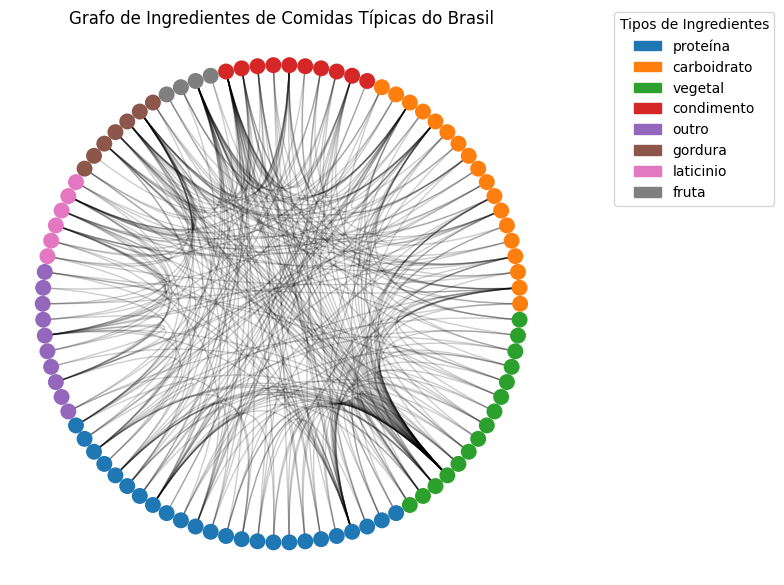

In [14]:
# Mapeamento de cores por tipo
types_list = types.index.tolist()
cmap = plt.get_cmap('tab10')
color_map = {t: cmap(i % cmap.N) for i, t in enumerate(types_list)}

# Plot funcional com nxviz.circos
fig, ax = plt.subplots(figsize=(8, 8))

circos(
    G,
    group_by='tipo',            # Agrupar nós por tipo de ingrediente
    node_color_by='tipo',       # Colorir nós conforme o atributo 'tipo'
    node_palette=color_map,     # Paleta de cores para os nós
)

# Legenda externa
legend_handles = [mpatches.Patch(color=color_map[t], label=t) for t in types_list]
ax.legend(
    handles=legend_handles,
    bbox_to_anchor=(1.1, 1.05),
    loc='upper left',
    title='Tipos de Ingredientes'
)

plt.title('Grafo de Ingredientes de Comidas Típicas do Brasil')
plt.tight_layout()
plt.show()

## **Interpretação dos resultados:**

O ponto mais relevante da análise é o coeficiente de assortatividade, que por ser próximo de 0, indica combinações aleatórias entre os ingredientes.
No entanto, o fato de ser negativo sugere uma inclinação à Heterofilia, ou seja, combinações entre ingredientes diferentes.

Alguns dados a mais também foram analisados, como os ingredientes mais comuns e os tipos com mais ingredientes.
Os ingredientes mais comuns são codimentos, gorduras e laticínios, que geralmente são ingredientes básicos em muitas receitas.
Enquanto os tipos com maior números de ingredientes são proteínas e carboidratos.

O grafo mostra uma represetação visual que nos permite confirmar a assortatividade próxima de 0, pois as arestas de distribuem de forma uniforme.